# Analisis Univariado

A continuación se procederá a examinar cada variable de forma individual con el objetivo de entender su distribución, medidas centrales y de dispersión. Para complementar el análisis utilizaremos tablas estadísticas y gráficas según se considere adecuado.

In [94]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Carga del dataset y construcción del dataframe de trabajo
datos = pd.read_csv("/Users/pctm/Downloads/data_payments.csv")

df = datos.rename(columns={
    'KEY':          'clave',
    'FREQ':         'frecuencia',
    'REF_AREA':     'pais_origen',
    'COUNT_AREA':   'pais_destino',
    'TYP_TRNSCTN':  'tipo_trx',
    'RL_TRNSCTN':   'tipo_psp',
    'FRD_TYP':      'tipo_fraude',
    'UNIT_MEASURE': 'unidad',
    'TIME_PERIOD':  'anio',
    'OBS_VALUE':    'monto',
    'OBS_STATUS':   'tipo_monto',
    'DECIMALS':     'decimales',
    'TITLE':        'descripcion',
    'UNIT_MULT':    'multiplicador_unidad'
})[[  
    'clave', 'frecuencia', 'pais_origen', 'pais_destino',
    'tipo_trx', 'tipo_psp', 'tipo_fraude', 'unidad',
    'anio', 'monto', 'tipo_monto', 'decimales',
    'descripcion', 'multiplicador_unidad'
]]

df.head()



,clave,frecuencia,pais_origen,pais_destino,tipo_trx,tipo_psp,tipo_fraude,unidad,anio,monto,tipo_monto,decimales,descripcion,multiplicador_unidad
0,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2014,0.242,A,3,"Total payment transactions, incl. cash withdra...",6
1,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2015,0.268,A,3,"Total payment transactions, incl. cash withdra...",6
2,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2016,0.689,A,3,"Total payment transactions, incl. cash withdra...",6
3,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2017,0.632,A,3,"Total payment transactions, incl. cash withdra...",6
4,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2018,0.615,A,3,"Total payment transactions, incl. cash withdra...",6


## Target Variable: tipo_fraude

#### Tabla

In [95]:
# Tabla de frecuencias de tipo_fraude
tabla_y = (
    df['tipo_fraude']
    .value_counts()
    .reset_index()
    .rename(columns={'tipo_fraude': 'tipo_fraude', 'count': 'Fraude'})
)
tabla_y['Porcentaje'] = (tabla_y['Fraude'] / tabla_y['Fraude'].sum() * 100).round(1)

tabla_y

,tipo_fraude,Fraude,Porcentaje
0,_Z,660672,99.7
1,F,1944,0.3


La variable **tipo_fraude** representa la clasificación del fraude indentificado en una transacción. Del total de observaciones, 660.672 no están relacionadas a un caso de fraude, mientras que 1944 transacciones fueron marcadas como movimientos fraudulentos. Debido al alto desequilibrio entre las observaciones legales y las transacciones fraudulentas se debe tener mucha precaución a la hora de construir el modelo de predicción.

#### Gráfico

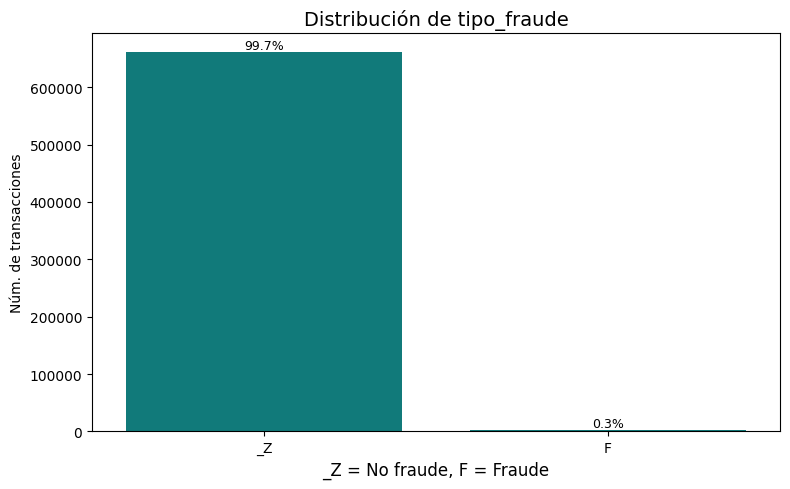

In [96]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='tipo_fraude', y='Fraude', data=tabla_y, ax=ax, color='#008B8B', order=tabla_y['tipo_fraude'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_y['Porcentaje'])):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.01,
            f"\n{pct:.1f}%", ha='center', va='bottom', fontsize=9)

ax.set_title('Distribución de tipo_fraude', fontsize=14)
ax.set_xlabel('_Z = No fraude, F = Fraude', fontsize=12)
ax.set_ylabel('Núm. de transacciones')
plt.tight_layout()
plt.show()

Este gráfico muestra la distribución del tipo de transacción, confirmando que la mayoria de transacciones observadas no fueron marcadas como fraude. Puntualmente el 99.7% de las transacciones fueron consideradas legales, mientras que el 0.3% fueron asociadas con algún comportamiento irregular. Esta notable diferencia indica un alto desbalance en las clases de la variable objetivo, lo cual es importante destacar al momento de construir modelos predictivos.

## Variables Características Categóricas

A continuación se examinarán detenidamente cada una de las variables.

### clave

Clave compuesta identificadora de las caracteristicas generales de una transacción. No es única.

In [97]:
tabla_ID = (
    df['clave']
    .value_counts()
    .reset_index()
    .rename(columns={'clave': 'Categoria', 'count': 'Frecuencia'})
)

tabla_ID.head()

,Categoria,Frecuencia
0,PAY.A.CY.W0.SER.1._Z.N.PN_R_TT,25
1,PAY.A.ES.W0.CP0.1._Z.N.EUR_R_POP,25
2,PAY.A.AT.W0.CP0.1._Z.N.PN,25
3,PAY.A.CZ.W0.CT0.1._Z.N.EUR_R_TT,25
4,PAY.A.RO.W0.CHQ.2._Z.G1.XDF,25


Como se ve en la tabla, la columna **KEY** corresponde a una clave compuesta por las prinicpales caracteristicas de transacción como el tipo de monto, la unidad, tipo de fraude, etc.

### frecuencia

Describe la recurrencia con la que se realiza determinado pago (Anual, trimestral, semestral, etc.). Se categoriza en:

**- A:** Transacciones anuales

**- H:** Transacciones semestrales

**- Q:** Transacciones trimestrales

#### Tabla

In [98]:
# Tabla de frecuencias de frecuencia
tabla_freq = (
    df['frecuencia']
    .value_counts()
    .reset_index()
    .rename(columns={'frecuencia': 'Categoria', 'count': 'Frecuencia'})
)
tabla_freq['Porcentaje'] = (tabla_freq['Frecuencia'] / tabla_freq['Frecuencia'].sum() * 100).round(2)

tabla_freq

,Categoria,Frecuencia,Porcentaje
0,A,275179,41.53
1,H,236884,35.75
2,Q,150553,22.72


#### Gráfico

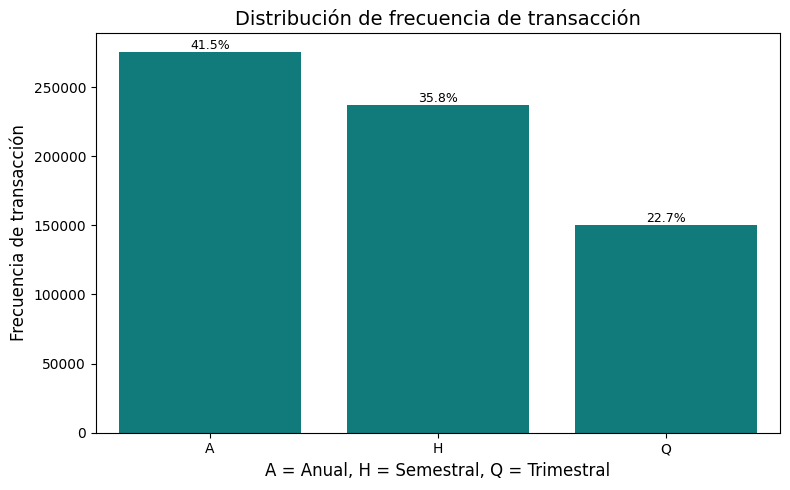

In [99]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Categoria', y='Frecuencia', data=tabla_freq, ax=ax, color='#008B8B', order=tabla_freq['Categoria'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_freq['Porcentaje'])):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.01,
            f"\n{pct:.1f}%", ha='center', va='bottom', fontsize=9)

ax.set_title('Distribución de frecuencia de transacción', fontsize=14)
ax.set_ylabel('Frecuencia de transacción', fontsize=12)
ax.set_xlabel('A = Anual, H = Semestral, Q = Trimestral', fontsize=12)
plt.tight_layout()
plt.show()


La tabla y gráfico anteriores describen la distribución de la variable **frecuencia** del dataset, que permite caracterizar la recurrencia habitual de las transacciones. Las transacciones anuales (A) representan un 41.53% del total, mientras que la frecuencia semestral (H) y trimestral (Q) agrupan un 35.75% y 22.72%, cada una. En números exactos esto es 275.179, 236.884 y 150.553 transacciones respectivamente.

### pais_origen

Presenta el código del país origen del movimiento bancario.

#### Tabla

In [100]:

lookup = pd.DataFrame({
    'Categoria': ['RO','HU','PL','CZ','NL','PT','LT','DE','FI','LU','GR','BE','ES','LV','IT','AT','FR','IE','CY','EE','SK','SI','MT','BG','HR','DK','U2','B0','SE'],
    'NombrePais': ['Romania','Hungary','Poland','Czech Republic','Netherlands','Portugal','Lithuania','Germany','Finland','Luxembourg','Greece','Belgium','Spain','Latvia','Italy','Austria','France','Ireland','Cyprus','Estonia','Slovakia','Slovenia','Malta','Bulgaria','Croatia','Denmark','Euro Area changing composition','EU changing composition','Sweden']
})

tabla_country = (
    df['pais_origen']
    .value_counts()
    .reset_index()
    .rename(columns={'pais_origen': 'Categoria', 'count': 'Frecuencia'})
)
tabla_country['Porcentaje'] = (tabla_country['Frecuencia'] / tabla_country['Frecuencia'].sum() * 100).round(2)
tabla_country = tabla_country.merge(lookup, on='Categoria', how='left')

tabla_country

,Categoria,Frecuencia,Porcentaje,NombrePais
0,RO,28816,4.35,Romania
1,HU,28794,4.35,Hungary
2,PL,28267,4.27,Poland
3,CZ,28133,4.25,Czech Republic
4,NL,27274,4.12,Netherlands
5,PT,25672,3.87,Portugal
6,LT,25590,3.86,Lithuania
7,DE,25219,3.81,Germany
8,FI,25162,3.80,Finland
9,LU,25156,3.80,Luxembourg


#### Gráfico

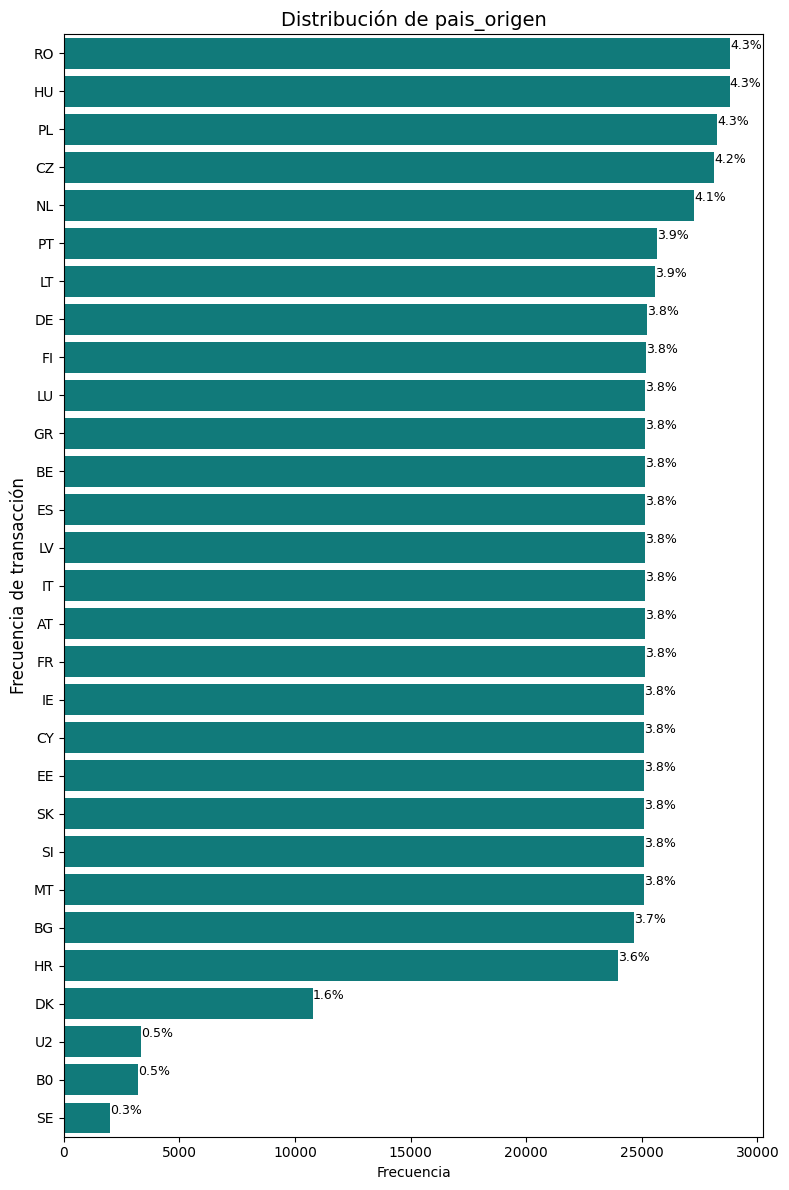

In [101]:


fig, ax = plt.subplots(figsize=(8,12))
sns.barplot(x='Frecuencia', y='Categoria', data=tabla_country, ax=ax, color='#008B8B', order=tabla_country['Categoria'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_country['Porcentaje'])):
    width = patch.get_width()
    ax.text(width + 0.01, patch.get_y() ,
            f"\n{pct:.1f}%", ha='left', va='center', fontsize=9)

plt.title('Distribución de pais_origen', fontsize=14)

ax.set_ylabel('Frecuencia de transacción', fontsize=12)

plt.tight_layout()
plt.show()


La tabla y gráfico anteriores describen la distribución de la variable **pais_origen** del dataset, que permite caracterizar el origen de las transacciones. A simple vista se puede notar que los países tienen frecuencias muy similares, no hay único país que destaque de forma dominante frente a los demás. Romania, Hungría, Polonia, República Checa y Paises bajos son los 5 territorios con el porcentaje de origen más alto superior al 4% cada uno. Por otro lado, encontramos entidades especiales como la "Euro Area changing composition" y "EU changing composition" que presentan una baja frecuencia frente a otros mercados (menos del 1%).

> **Euro Area changing composition/EU changing composition**: hace referencia a países que han sido incluidos/excluidos de la zona del euro o en la unión europea en el transcurso de los años. Por ejemplo, Grecia se incorporó al uso del euro en el año 2000, mientras que Groenlandia que se retiró de la Unión Europea (anteriormente Comunidad Europea) en 1985.

### pais_destino

Presenta el código del país destino del movimiento bancario.

#### Tabla

In [102]:
# Lookup de nombres de países destino
lookup_org = pd.DataFrame({
    'Categoria': ['W0','W1','W2','G1','SE','DK','BG','GR','AT','BE','SI','SK','CY','ES','FI','FR','IT','DE','IE','EE','LU','MT','LV','HR','LT','PT','CZ','PL','HU','RO','NL','G3','NO','IS','LI','AR','AU','BR','CA','CN','GB','ID','IN','JP','KR','MX','RU','SA','TR','US','ZA'],
    'NombrePais': ['World','Rest of the World','Domestic (home or reference area)','Extra EEA','Sweden','Denmark','Bulgaria','Greece','Austria','Belgium','Slovenia','Slovakia','Cyprus','Spain','Finland','France','Italy','Germany','Ireland','Estonia','Luxembourg','Malta','Latvia','Croatia','Lithuania','Portugal','Czech Republic','Poland','Hungary','Romania','Netherlands','Other EEA countries (all countries excluding the reference area)','Norway','Iceland','Liechtenstein','Argentina','Australia','Brazil','Canada','China','United Kingdom','Indonesia','India','Japan','Korea, Republic of','Mexico','Russian Federation','Saudi Arabia','Turkey','United States','South Africa']
})

tabla_country_dest = (
    df['pais_destino']
    .value_counts()
    .reset_index()
    .rename(columns={'pais_destino': 'Categoria', 'count': 'Frecuencia'})
)
tabla_country_dest['Porcentaje'] = (tabla_country_dest['Frecuencia'] / tabla_country_dest['Frecuencia'].sum() * 100).round(2)
tabla_country_dest = tabla_country_dest.merge(lookup_org, on='Categoria', how='left')

tabla_country_dest

,Categoria,Frecuencia,Porcentaje,NombrePais
0,W0,88733,13.39,World
1,W1,21755,3.28,Rest of the World
2,W2,21507,3.25,Domestic (home or reference area)
3,G1,17392,2.62,Extra EEA
4,SE,16057,2.42,Sweden
5,DK,15769,2.38,Denmark
6,BG,15488,2.34,Bulgaria
7,GR,15440,2.33,Greece
8,BE,15437,2.33,Belgium
9,AT,15437,2.33,Austria


#### Gráfico

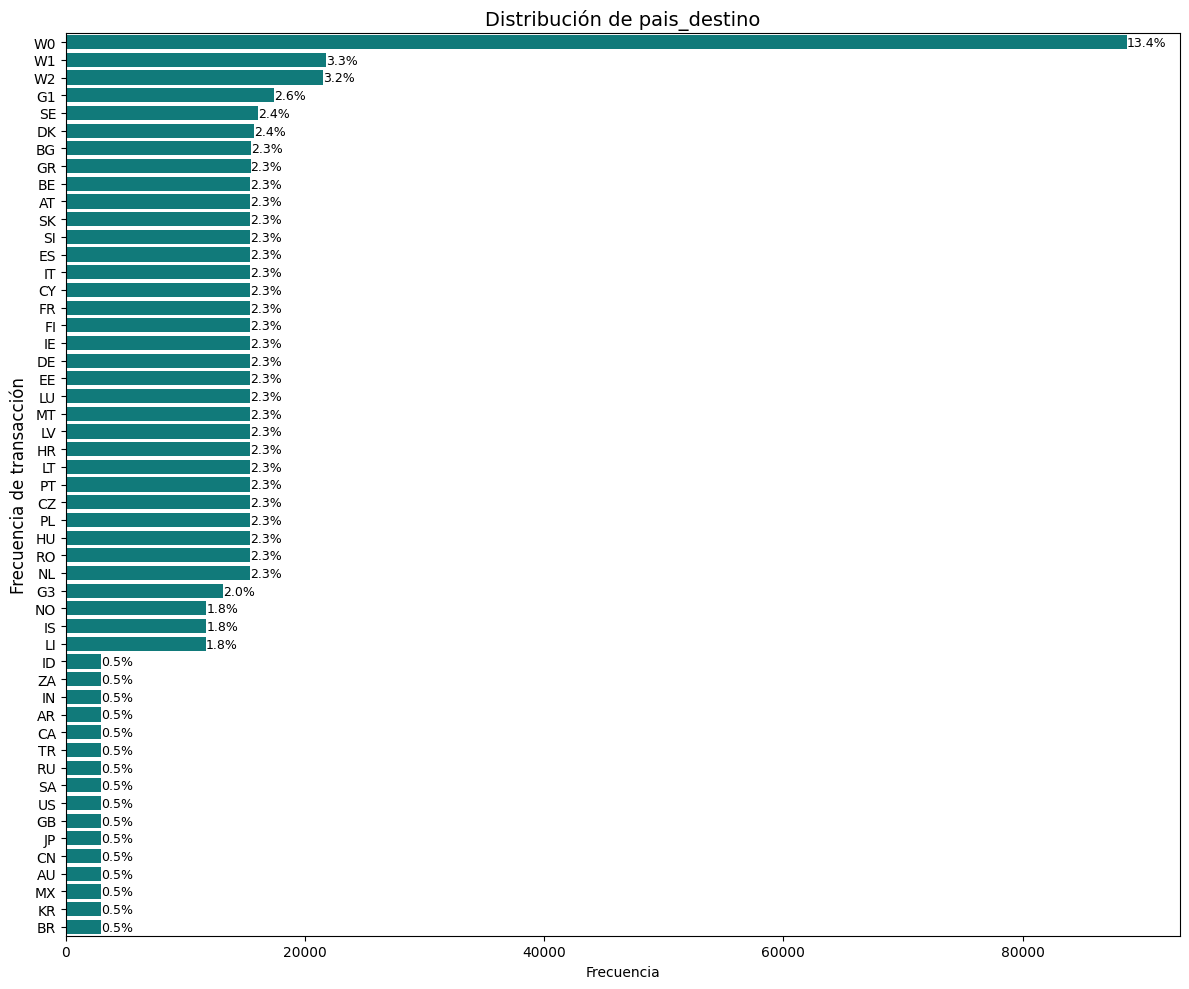

In [103]:

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='Frecuencia', y='Categoria', data=tabla_country_dest, ax=ax, color='#008B8B', order=tabla_country_dest['Categoria'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_country_dest['Porcentaje'])):
    width = patch.get_width()
    ax.text(width + 0.01, patch.get_y() ,
            f"\n{pct:.1f}%", ha='left', va='center', fontsize=9)

plt.title('Distribución de pais_destino', fontsize=14)

ax.set_ylabel('Frecuencia de transacción', fontsize=12)

plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **pais_destino** del dataset, que permite caracterizar el destino de las transacciones. Empezamos destacando que el 22.54% de las transacciones no especifican el destino final si no que generalizan en entidades como World, Rest of the World, Domestic y Extra EEA cada una con una representación del 13%, 3.28%, 3.25% y 2.62%. Para los paises europeos explicitamente listados se manejan porcentajes de representación del 2% cada uno aproximadamente. Mientras que, los paises destino fuera de la EEA comprenden menos del 1% cada uno.

> **World:** Hace referencia a todo el conjunto de pais e instituciones existentes, incluyendo al país de referencia.
>
>**Rest of the world**: Hace referencia a todo el conjunto de pais e instituciones existentes, excluyendo al país de origen.
>
>**Domestic:** Hace referencia a las entidades dentro del territorio economico de un país
>
>**Extra EEA:** Hace referencia a los demás paises y entidades del Espacio Económico Europeo, incluyendo Noruega, Islandia y Liechtenstein.
>
>**Other EEA countries (all countries excluding the reference area):** Hace referencia a los demás paises y entidades del Espacio Económico Europeo excluyendo al país de origen

### tipo_trx

Describe el tipo de movimiento bancario realizado.

#### Tabla

In [104]:
# Lookup de instrumentos de transacción
lookup_instrument = pd.DataFrame({
    'Categoria': ['CHQ','CP0','CT0','CW1','DD','EMP0','MREM','ND0','ND1','ND2','ND3','SER','TOTL','TOTL1'],
    'NombreInstrumento': [
        'Cheques', 'Card payments', 'Credit transfers',
        'Cash withdrawals using cards', 'Direct debits', 'E-money payments',
        'Money remittances',
        'Other services (not included in Directive (EU) 2013/2466)',
        'Credits to the accounts by simple book entry',
        'Debits from the accounts by simple book entry',
        'Other services than credits and debits from the accounts by simple book entry',
        'Other payment services', 'Total payment transactions',
        'Total payment transactions, excluding cash withdrawals'
    ]
})

tabla_typetrx = (
    df['tipo_trx']
    .value_counts()
    .reset_index()
    .rename(columns={'tipo_trx': 'Categoria', 'count': 'Frecuencia'})
)
tabla_typetrx['Porcentaje'] = (tabla_typetrx['Frecuencia'] / tabla_typetrx['Frecuencia'].sum() * 100).round(2)
tabla_typetrx = tabla_typetrx.merge(lookup_instrument, on='Categoria', how='left')

tabla_typetrx

,Categoria,Frecuencia,Porcentaje,NombreInstrumento
0,DD,96675,14.59,Direct debits
1,CT0,96663,14.59,Credit transfers
2,EMP0,92772,14.00,E-money payments
3,CHQ,92173,13.91,Cheques
4,CP0,59765,9.02,Card payments
5,SER,56997,8.60,Other payment services
6,MREM,52272,7.89,Money remittances
7,TOTL,48151,7.27,Total payment transactions
8,TOTL1,44336,6.69,"Total payment transactions, excluding cash wit..."
9,CW1,18738,2.83,Cash withdrawals using cards


#### Gráfico

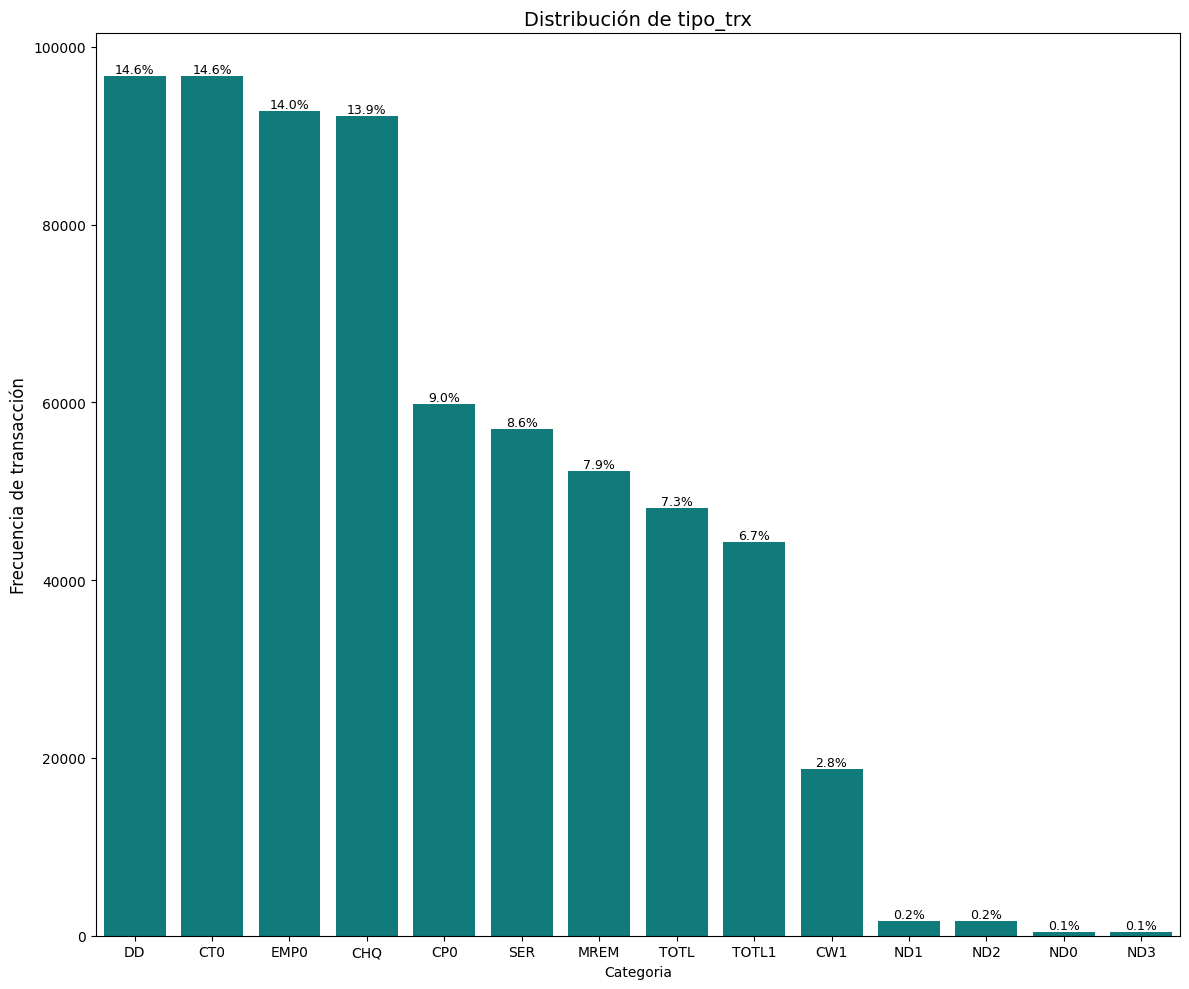

In [105]:

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='Categoria', y='Frecuencia', data=tabla_typetrx, ax=ax, color='#008B8B', order=tabla_typetrx['Categoria'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_typetrx['Porcentaje'])):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.03,
            f"\n{pct:.1f}%", ha='center', va='bottom', fontsize=9)

plt.title('Distribución de tipo_trx', fontsize=14)

ax.set_ylabel('Frecuencia de transacción', fontsize=12)

plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **tipo_trx** del dataset, que permite caracterizar el movimiento bancario realizado y su instrumento. Los debitos directos y transferencias de credito son las categorías más grandes con un porcentaje del 14.59% cada una, seguida por pagos electronicos (13.91%) y cheques (9.02%). El pago por tarjetas de credito predomina ligeramente sobre otros servicios de pago, observandose un 9.02% sobre un 8.60%. Con aproximadamente un 1% de participación la categorías ND* son marginales y podría considerarse su agrupación. Mientras que las columnas de TOTL y TOLT representan rotales agregados, no instrumentos individuales.

### tipo_psp

Caracteriza al proveedor que realiza la transacción. Se categoriza en:

**- 1 Payer's PSP:** Proveedor de servicios de pago del pagador. Entidad que procesa el pago de quien envía el dinero.

**- 2 Payee's PSP:** Proveedor de servicios de pago del beneficiario. Entidad que procesa el pago de quien recibe el dinero.

**- _Z NA:** Transacciones sin rol definifido o internas.

#### Tabla

In [106]:
# Tabla de frecuencias de tipo_psp
tabla_psp = (
    df['tipo_psp']
    .value_counts()
    .reset_index()
    .rename(columns={'tipo_psp': 'Categoria', 'count': 'Frecuencia'})
)
tabla_psp['Porcentaje'] = (tabla_psp['Frecuencia'] / tabla_psp['Frecuencia'].sum() * 100).round(2)

tabla_psp

,Categoria,Frecuencia,Porcentaje
0,1,387724,58.51
1,2,270818,40.87
2,_Z,4074,0.61


#### Gráfico

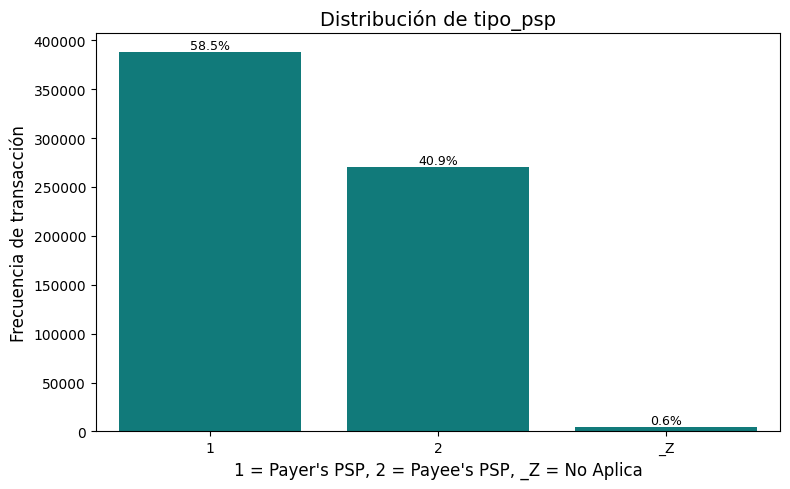

In [107]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Categoria', y='Frecuencia', data=tabla_psp, ax=ax, color='#008B8B', order=tabla_psp['Categoria'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_psp['Porcentaje'])):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.01,
            f"\n{pct:.1f}%", ha='center', va='bottom', fontsize=9)

ax.set_title('Distribución de tipo_psp', fontsize=14)
ax.set_ylabel('Frecuencia de transacción', fontsize=12)
ax.set_xlabel(f'1 = Payer\'s PSP, 2 = Payee\'s PSP, _Z = No Aplica', fontsize=12)
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **tipo_psp** del dataset, que permite caracterizar el rol de la transacción. El 58.51% de las transacciones se registraron desde el psp del pagador, esto es 387.724, frente a 270.818 o 40.87% asociadas al psp del beneficiario. Por otro lado, se tiene un 0.61% de transacciones no asociadas a ninguna de las clasificaciones anteriores, quizá por tratarse de movimientos monetarios internos.

### unidad

Unidad o divisa involucrada en la transacción.

#### Tabla

In [108]:
# Lookup de unidades/divisas
lookup_currency = pd.DataFrame({
    'Categoria': ['PN','EUR','XDF','PN_R_POP','EUR_R_POP','EUR_R_TT','PN_R_TT',
                  'EUR_R_PNT','EUR_R_B1GQ','XDF_R_TT','XDF_R_PNT','XDF_R_POP',
                  'PN_R_POP6','EUR_R_POP6','XDF_R_POP6'],
    'NombreUnidad': [
        'Pure number', 'Euro',
        'Domestic currency (incl. conversion to current currency made using a fixed parity or market exchange rate)',
        'Pure number per capita', 'Euro per capita',
        'Euro; ratio to total value payment transactions',
        'Pure number; ratio to total number payment transactions',
        'Euro; ratio to number of transactions',
        'Euro; ratio to gross domestic product',
        'Domestic currency; ratio to total value payment transactions',
        'Domestic currency; ratio to number of transactions',
        'Domestic currency per capita',
        'Pure number per million inhabitants',
        'Euro per million inhabitants',
        'Domestic currency per million inhabitants'
    ]
})

tabla_unit = (
    df['unidad']
    .value_counts()
    .reset_index()
    .rename(columns={'unidad': 'Categoria', 'count': 'Frecuencia'})
)
tabla_unit['Porcentaje'] = (tabla_unit['Frecuencia'] / tabla_unit['Frecuencia'].sum() * 100).round(2)
tabla_unit = tabla_unit.merge(lookup_currency, on='Categoria', how='left')

tabla_unit

,Categoria,Frecuencia,Porcentaje,NombreUnidad
0,PN,296348,44.72,Pure number
1,EUR,258391,39.00,Euro
2,XDF,61103,9.22,Domestic currency (incl. conversion to current...
3,PN_R_POP,7724,1.17,Pure number per capita
4,EUR_R_POP,7688,1.16,Euro per capita
5,EUR_R_TT,7555,1.14,Euro; ratio to total value payment transactions
6,PN_R_TT,7523,1.14,Pure number; ratio to total number payment tra...
7,EUR_R_PNT,7061,1.07,Euro; ratio to number of transactions
8,EUR_R_B1GQ,4487,0.68,Euro; ratio to gross domestic product
9,XDF_R_TT,1560,0.24,Domestic currency; ratio to total value paymen...


#### Gráfico

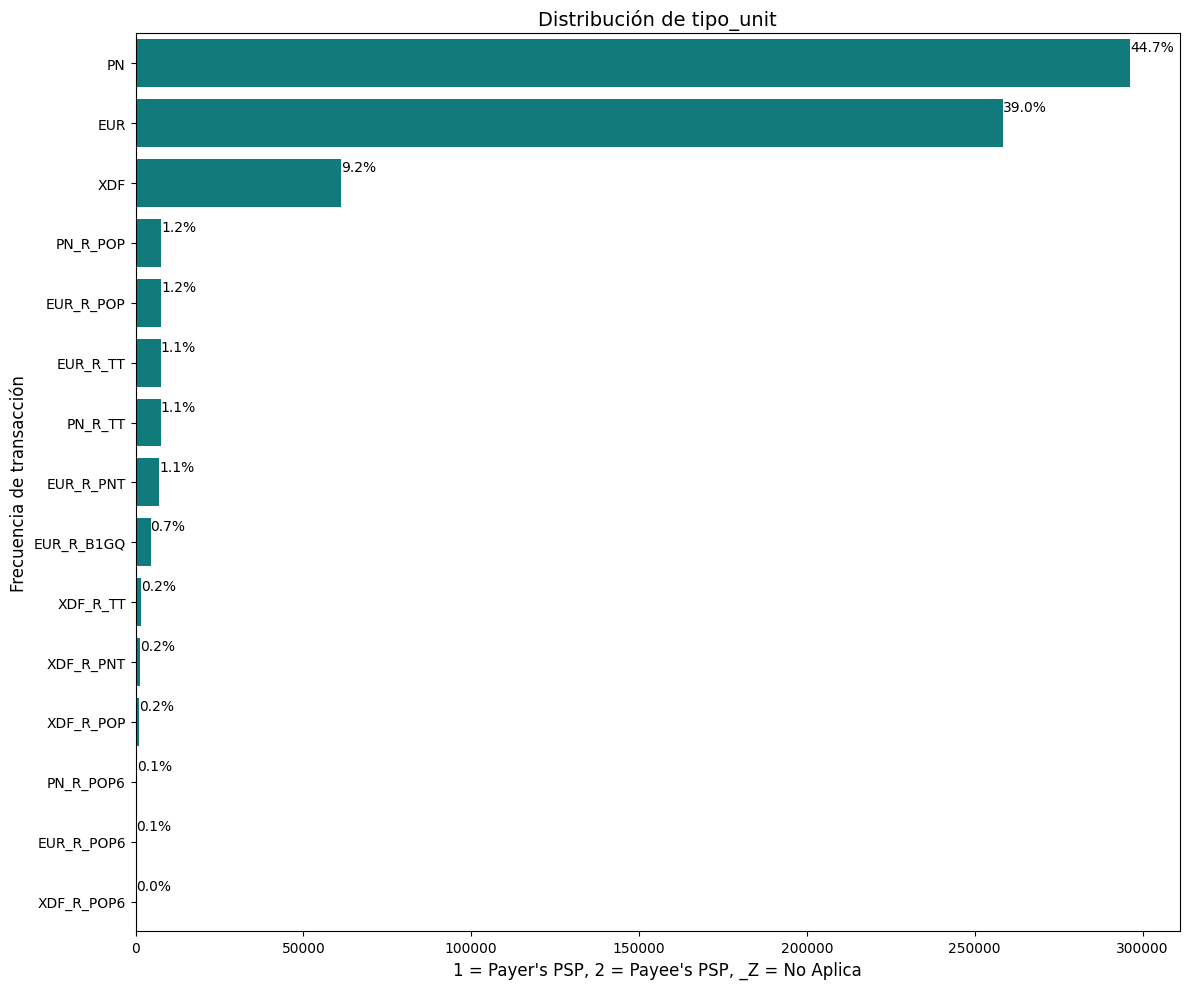

In [109]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(y='Categoria', x='Frecuencia', data=tabla_unit, ax=ax, color='#008B8B', order=tabla_unit['Categoria'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_unit['Porcentaje'])):
    width = patch.get_width()
    ax.text(width + 0.01, patch.get_y() ,
            f"\n{pct:.1f}%", ha='left', va='center', fontsize=10)

ax.set_title('Distribución de tipo_unit', fontsize=14)
ax.set_ylabel('Frecuencia de transacción', fontsize=12)
ax.set_xlabel(f'1 = Payer\'s PSP, 2 = Payee\'s PSP, _Z = No Aplica', fontsize=12)
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **unidad** del dataset, que permite caracterizar el tipo de unidad o medida en la que se reporta una observación. Destacan los grupos PN (número puro o conteo), EUR y XDF (Divisa domestica) con un 44.75%, 39% y 9.22% respectivamente. Adicionalmente, se presentan ratios por total de habitantes, número de transacciones, toal de transacciones, entre otros, en menor proporción. Carece de sentido realizar comparaciones directas entre las distintas series, se debe realizar una transformación para que puedan trabajarse de forma equivalente.

### anio

Año en el que se procesó la transacción.

#### Tabla

In [110]:
# Tabla de frecuencias de anio
tabla_country_year = (
    df.loc[df['anio'].astype(str).str.len() == 4, 'anio'] 
    .value_counts()
    .reset_index()
    .rename(columns={'anio': 'Categoria', 'count': 'Frecuencia'})
    .sort_values('Categoria')
)
tabla_country_year['Porcentaje'] = (tabla_country_year['Frecuencia'] / tabla_country_year['Frecuencia'].sum() * 100).round(2)

tabla_country_year

,Categoria,Frecuencia,Porcentaje
24,2000,1786,0.65
23,2001,1939,0.70
22,2002,1955,0.71
21,2003,1955,0.71
19,2004,1963,0.71
20,2005,1963,0.71
18,2006,2021,0.73
17,2007,2022,0.73
16,2008,2024,0.74
15,2009,2025,0.74


#### Gráfico

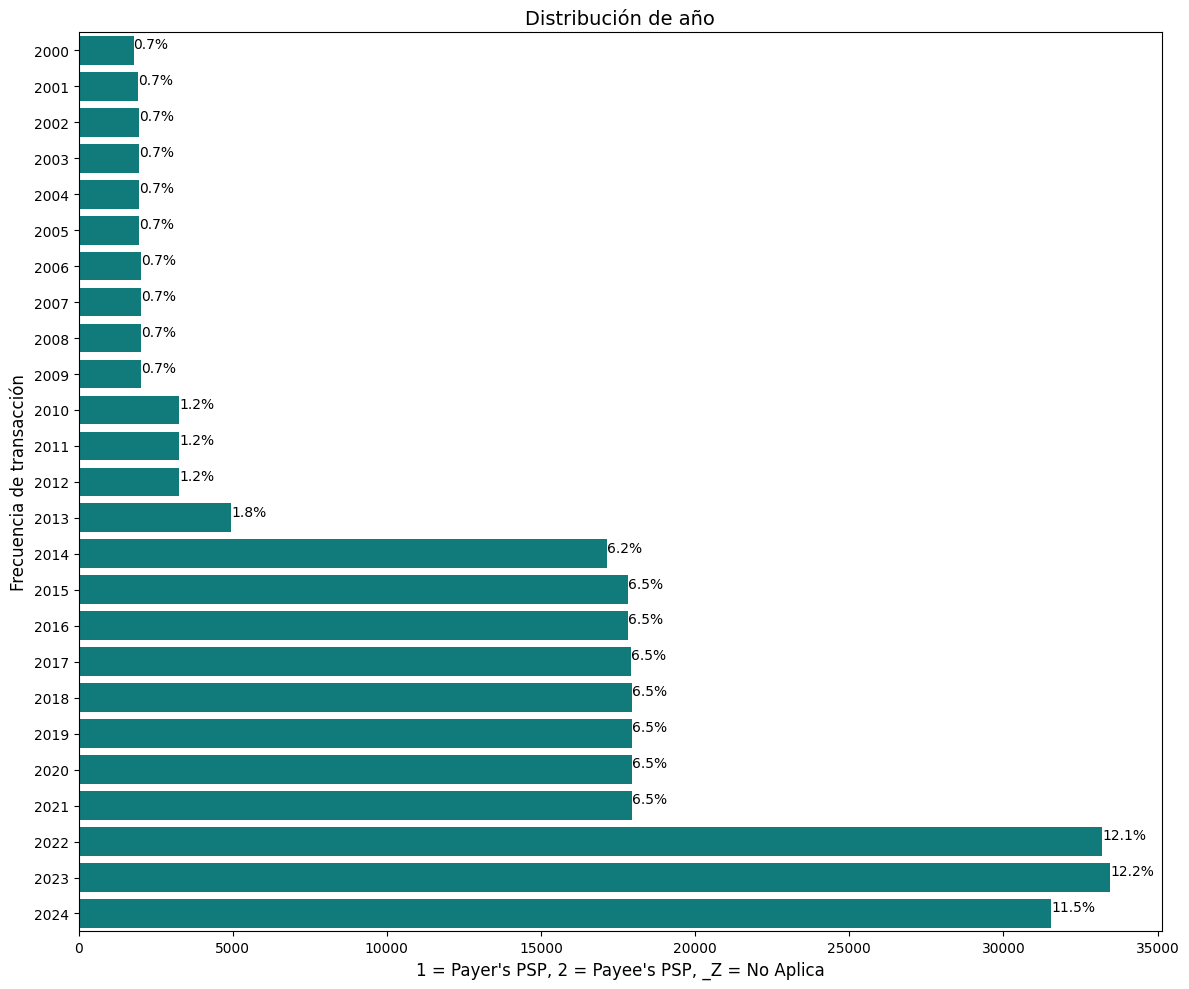

In [111]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(y='Categoria', x='Frecuencia', data=tabla_country_year, ax=ax, color='#008B8B', order=tabla_country_year['Categoria'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_country_year['Porcentaje'])):
    width = patch.get_width()
    ax.text(width + 0.01, patch.get_y() ,
            f"\n{pct:.1f}%", ha='left', va='center', fontsize=10)

ax.set_title('Distribución de año', fontsize=14)
ax.set_ylabel('Frecuencia de transacción', fontsize=12)
ax.set_xlabel(f'1 = Payer\'s PSP, 2 = Payee\'s PSP, _Z = No Aplica', fontsize=12)
plt.tight_layout()
plt.show()

La tabla anterior describen la distribución de la variable **anio** del dataset, que permite caracterizar el destino año o periodo de tiempo en el que se procesaron las transacciones. A simple vista se nota que hay años representados solos, por trimestre o semestre. Es importante notar que estas divisiones no representan acumulados entre si, solo son categorías distintas de registro. Se nota progresivamente el incremento en movimientos bancarios desde el año 2000, destacandose el incremento exponencial a partir del año 2014. Los últimos 5 años han marcado records historicos en total de transacciones registradas.

### tipo_monto

Presenta la clasificación del monto de la transacción (revisado, no validado, valor provisional, etc). Se categoriza de la siguiente forma:

**- A:** Valor normal.

**- Q** Valor faltante, suprimido.

**- M:** Valor faltante, dato no puede existir.

**- P** Valor temporal.

**- L** Valor faltante, dato existente pero no pudo ser recolectado.

**- E** Valor estimado

#### Tabla

In [112]:
# Tabla de frecuencias de tipo_monto
tabla_type_amount = (
    df['tipo_monto']
    .value_counts()
    .reset_index()
    .rename(columns={'tipo_monto': 'Categoria', 'count': 'Frecuencia'})
)
tabla_type_amount['Porcentaje'] = (tabla_type_amount['Frecuencia'] / tabla_type_amount['Frecuencia'].sum() * 100).round(2)

tabla_type_amount

,Categoria,Frecuencia,Porcentaje
0,A,482780,72.86
1,Q,93601,14.13
2,M,48997,7.39
3,P,35316,5.33
4,L,1277,0.19
5,E,645,0.10


#### Gráfico

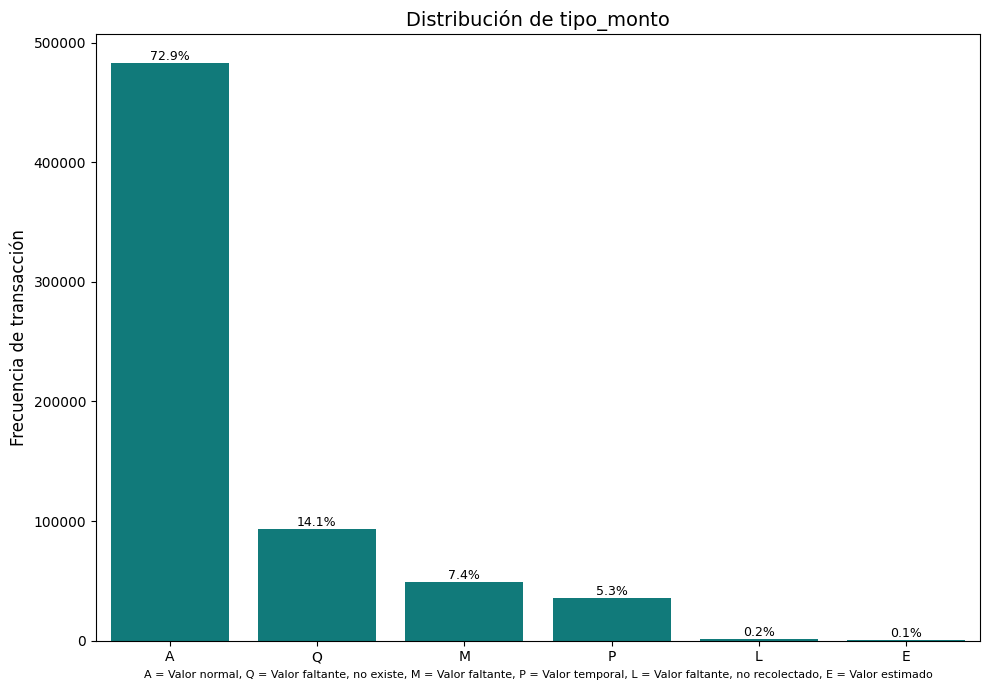

In [113]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='Categoria', y='Frecuencia', data=tabla_type_amount, ax=ax, color='#008B8B', order=tabla_type_amount['Categoria'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_type_amount['Porcentaje'])):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.01,
            f"\n{pct:.1f}%", ha='center', va='bottom', fontsize=9)

ax.set_title('Distribución de tipo_monto', fontsize=14)
ax.set_ylabel('Frecuencia de transacción', fontsize=12)
ax.set_xlabel(f'A = Valor normal, Q = Valor faltante, no existe, M = Valor faltante, P = Valor temporal, L = Valor faltante, no recolectado, E = Valor estimado', fontsize=8)
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **tipo_monto** del dataset, que permite caracterizar la validez del monto registrado en la columna monto. De forma general vemos que el 72.86% de las observaciones fueron clasificadas como A, es decir, el monto fue validado correctamente. Mientras que el 28% restante presentan un monto poco fiable que pudo haber sido suprimido, estimado, no recolectado, etc.

### decimales

Indica la cantidad de decimales presentes en el monto.

#### Tabla

In [114]:
# Tabla de frecuencias de decimales
tabla_decimals_amount = (
    df['decimales']
    .value_counts()
    .reset_index()
    .rename(columns={'decimales': 'Categoria', 'count': 'Frecuencia'})
    .sort_values('Frecuencia', ascending=False)
)
tabla_decimals_amount['Porcentaje'] = (tabla_decimals_amount['Frecuencia'] / tabla_decimals_amount['Frecuencia'].sum() * 100).round(2)

tabla_decimals_amount

,Categoria,Frecuencia,Porcentaje
0,3,601106,90.72
1,2,61510,9.28


#### Gráfico

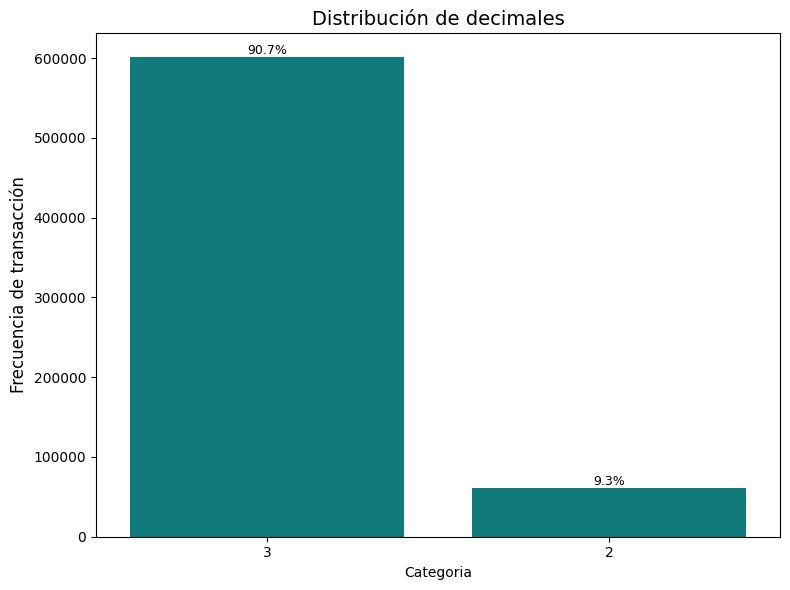

In [115]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Categoria', y='Frecuencia', data=tabla_decimals_amount, ax=ax, color='#008B8B', order=tabla_decimals_amount['Categoria'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_decimals_amount['Porcentaje'])):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.01,
            f"\n{pct:.1f}%", ha='center', va='bottom', fontsize=9)

ax.set_title('Distribución de decimales', fontsize=14)
ax.set_ylabel('Frecuencia de transacción', fontsize=12)
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **decimales** del dataset, que permite caracterizar la cantidad de decimales en la columna monto. Resulta de utilidad pues será relacionada con la columna multiplicador_unidad. Vemos que el 90.72% de los montos tienen 3 unidades decimales, frente al casi 10% restante que tiene 2.

### descripcion

Descripción de la transacción.

#### Tabla

In [116]:
# Tabla de las 10 descripciones más frecuentes
tabla_description = (
    df['descripcion']
    .value_counts()
    .reset_index()
    .rename(columns={'descripcion': 'Categoria', 'count': 'Frecuencia'})
    .head(10)
)
tabla_description['Porcentaje'] = (tabla_description['Frecuencia'] / df.shape[0] * 100).round(2)

tabla_description

,Categoria,Frecuencia,Porcentaje
0,"Card payments, sent",3503,0.53
1,"Cheques, sent",3491,0.53
2,"Credit transfers, sent",3489,0.53
3,"Direct debits, sent",3485,0.53
4,"Other payment services, sent",2595,0.39
5,"Total payment transactions, sent",2577,0.39
6,"E-money payments, sent",2386,0.36
7,"Credit transfers, sent, annual growth rate",2024,0.31
8,"Direct debits, sent, annual growth rate",2024,0.31
9,"Cheques, sent, annual growth rate",2022,0.31


Esta variable corresponde a un mensaje corto asociado a cada una de las transacciones, debido a la gran diversidad de entradas, solamente se mostrarán las más frecuentes como lo fueron "Card payments, sent", "Cheques, sent", "Credit transfers, sent", "Direct debits, sent" con más de 3000 apariciones.

### multiplicador_unidad

Indica el multiplicador del monto de la transacción.

#### Tabla

In [117]:
# Transformación de multiplicador_unidad: 0 → 1 (equivalente al case_when de R)
df['multiplicador_unidad'] = df['multiplicador_unidad'].apply(
    lambda x: np.nan if pd.isna(x) else (1 if x == 0 else int(x))
)

tabla_mulp_amount = (
    df['multiplicador_unidad']
    .value_counts(dropna=False)
    .reset_index()
    .rename(columns={'multiplicador_unidad': 'Categoria', 'count': 'Frecuencia'})
    .sort_values('Frecuencia', ascending=False)
)
tabla_mulp_amount['Porcentaje'] = (tabla_mulp_amount['Frecuencia'] / tabla_mulp_amount['Frecuencia'].sum() * 100).round(2)

tabla_mulp_amount

,Categoria,Frecuencia,Porcentaje
0,6,601018,90.7
1,1,61598,9.3


#### Gráfico

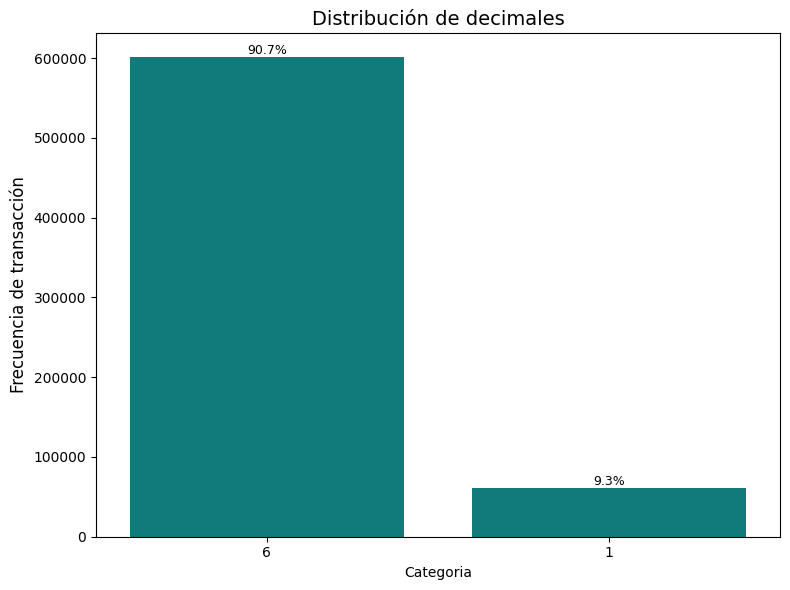

In [118]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Categoria', y='Frecuencia', data=tabla_mulp_amount, ax=ax, color='#008B8B', order=tabla_mulp_amount['Categoria'])

for i, (patch, pct) in enumerate(zip(ax.patches, tabla_mulp_amount['Porcentaje'])):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.01,
            f"\n{pct:.1f}%", ha='center', va='bottom', fontsize=9)

ax.set_title('Distribución de decimales', fontsize=14)
ax.set_ylabel('Frecuencia de transacción', fontsize=12)
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **multiplicador_unidad** del dataset, que permite caracterizar el multiplicador aplicado a la columna monto. Vemos que el 90.72% de los montos representado por un multiplicador de 6, es decir, millones, frente al casi 10% agrupado por 0, asociado a unidades.

## Variables Características Numéricas

### monto

#### Tabla

In [119]:
# Cálculo del monto real (monto * 10^(multiplicador_unidad - decimales))
tabla_monto = df[['pais_origen', 'monto', 'multiplicador_unidad', 'decimales', 'tipo_monto', 'unidad']].copy()
tabla_monto['monto_real'] = tabla_monto['monto'] * (10.0 ** (tabla_monto['multiplicador_unidad'] - tabla_monto['decimales']))

tabla_monto.head(15)

,pais_origen,monto,multiplicador_unidad,decimales,tipo_monto,unidad,monto_real
0,AT,0.242000,6,3,A,PN,242.000
1,AT,0.268000,6,3,A,PN,268.000
2,AT,0.689000,6,3,A,PN,689.000
3,AT,0.632000,6,3,A,PN,632.000
4,AT,0.615000,6,3,A,PN,615.000
5,AT,1.467000,6,3,A,PN,1467.000
6,AT,1.311000,6,3,A,PN,1311.000
7,AT,0.863000,6,3,A,PN,863.000
8,AT,1.568711,6,3,A,PN,1568.711
9,AT,1.754513,6,3,A,PN,1754.513


Como se ilustró anteriormente, los distintos tipos de unidad hacen que sea necesario dividir el análisis de esta variable en 3 categorías principales: PN, EUR y XDF

##### PN

In [120]:
# Filtro por unidad == 'PN'
tabla_monto_normal = tabla_monto[tabla_monto['unidad'] == 'PN'].copy()

tabla_monto_normal.head()

,pais_origen,monto,multiplicador_unidad,decimales,tipo_monto,unidad,monto_real
0,AT,0.242,6,3,A,PN,242.0
1,AT,0.268,6,3,A,PN,268.0
2,AT,0.689,6,3,A,PN,689.0
3,AT,0.632,6,3,A,PN,632.0
4,AT,0.615,6,3,A,PN,615.0


In [121]:
# Estadísticas descriptivas para PN
col = tabla_monto_normal['monto_real']
pd.DataFrame([{
    'n':          len(col),
    'n_missing':  col.isna().sum(),
    'pct_missing': round(col.isna().sum() / len(col) * 100, 2),
    'media':      col.mean(),
    'ds':         col.std(),
    'mediana':    col.median(),
    'minimo':     col.min(),
    'maximo':     col.max(),
    'Q1':         col.quantile(0.25),
    'Q3':         col.quantile(0.75),
    'IQR':        col.quantile(0.75) - col.quantile(0.25)
}])

,n,n_missing,pct_missing,media,ds,mediana,minimo,maximo,Q1,Q3,IQR
0,296348,66013,22.28,184743.726904,2.786927e+06,20.566,-10.0,2.077016e+08,0.0,1248.0,1248.0


La variable monto filtrada por PN fue analizada a partir de 296.348 observaciones. El total de datos faltantes corresponde a 66.013 observaciones, aproximadamente un 22% del total. Se obtuvo un promedio de 184.654 pn con una desviación estándar de 2.786.927, donde el 50% de los totales está por debajo de 20. El valor minimo fue aproximadamente de -10 y el máximo fue de 207.701.558 pn. El 25% de los datos son inferiores a 0 y el 75% menores a 1248. Como se ve, se encuentra un porcentaje llamativo de datos negativos, probablemente relacionados a saldos pendientes o deudas.

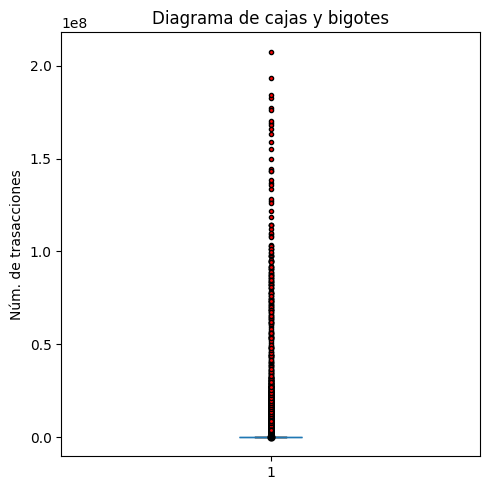

In [122]:
# Diagrama de cajas y bigotes para PN
fig, ax = plt.subplots(figsize=(5, 5))

datos_validos = tabla_monto_normal['monto_real'].dropna()
ax.boxplot(datos_validos, patch_artist=True,
           boxprops=dict(facecolor='#a6cee3', color='#1f78b4'),
           medianprops=dict(color='#1f78b4'),
           flierprops=dict(markerfacecolor='red', marker='o', markersize=3))

# Punto de la media
ax.plot(1, datos_validos.mean(), marker='o', color='black', markersize=5, zorder=5)

plt.title('Diagrama de cajas y bigotes')
plt.xlabel('')
plt.ylabel('Núm. de trasacciones')
plt.tight_layout()
plt.show()

La distibución de monto para el tipo PN es altamente asimetrica, con fuerte concentración de valores bajos y una cantidad significativa de valores extremos altos. Esto indica que aunque la mayoría de las transacciones tienen totales moderados, existen algunas con totales excepcionalmente altos que influyen notablemente en los estadísticos como la media y la desviación estándar.

##### EUR

In [123]:
# Filtro por unidad == 'EUR'
tabla_monto_eur = tabla_monto[tabla_monto['unidad'] == 'EUR'].copy()

tabla_monto_eur.head()

,pais_origen,monto,multiplicador_unidad,decimales,tipo_monto,unidad,monto_real
11,AT,5008.499,6,3,A,EUR,5008499.0
12,AT,6501.324,6,3,A,EUR,6501324.0
13,AT,6017.686,6,3,A,EUR,6017686.0
14,AT,6412.088,6,3,A,EUR,6412088.0
15,AT,6749.347,6,3,A,EUR,6749347.0


In [124]:
# Estadísticas descriptivas para EUR
col = tabla_monto_eur['monto_real']
pd.DataFrame([{
    'n':          len(col),
    'n_missing':  col.isna().sum(),
    'pct_missing': round(col.isna().sum() / len(col) * 100, 2),
    'media':      col.mean(),
    'ds':         col.std(),
    'mediana':    col.median(),
    'minimo':     col.min(),
    'maximo':     col.max(),
    'Q1':         col.quantile(0.25),
    'Q3':         col.quantile(0.75),
    'IQR':        col.quantile(0.75) - col.quantile(0.25)
}])

,n,n_missing,pct_missing,media,ds,mediana,minimo,maximo,Q1,Q3,IQR
0,258391,55972,21.66,3.534435e+08,5.407405e+09,27290.829063,-10.0,2.634231e+11,3.685505,1.656369e+06,1.656365e+06


La variable monto filtrada por EUR fue analizada a partir de 258.391 observaciones. El total de datos faltantes corresponde a 55.972 observaciones, aproximadamente un 22% del total. Se obtuvo un promedio de 353.443.535 euros con una desviación estándar de 5.407.405.070, donde el 50% de los montos está por debajo de 27.290.83 euros. El valor minimo fue aproximadamente de -10 y el máximo fue de 263.423.125.212 euros El 25% de los datos son inferiores a 3.68 euros y el 75% menores a 1.656.369 Como se ve, se encuentra un porcentaje llamativo de datos negativos, probablemente relacionados a saldos pendientes o deudas.

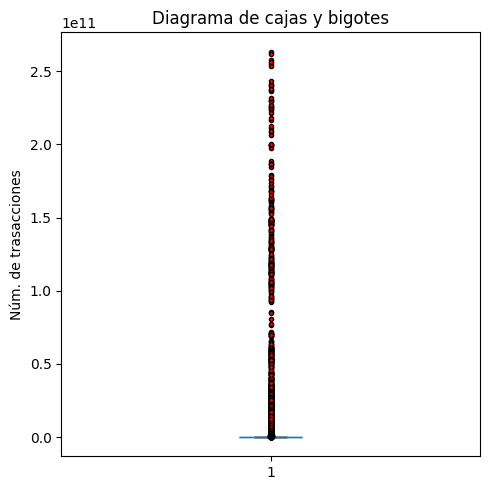

In [125]:
# Diagrama de cajas y bigotes para EUR
fig, ax = plt.subplots(figsize=(5, 5))

datos_validos = tabla_monto_eur['monto_real'].dropna()
ax.boxplot(datos_validos, patch_artist=True,
           boxprops=dict(facecolor='#a6cee3', color='#1f78b4'),
           medianprops=dict(color='#1f78b4'),
           flierprops=dict(markerfacecolor='red', marker='o', markersize=3))

ax.plot(1, datos_validos.mean(), marker='o', color='black', markersize=5, zorder=5)

plt.title('Diagrama de cajas y bigotes')
plt.xlabel('')
plt.ylabel('Núm. de trasacciones')
plt.tight_layout()
plt.show()

##### XDF

In [126]:
# Filtro por UNIT == 'XDF'
tabla_monto_xdf = tabla_monto[tabla_monto['unidad'] == 'XDF'].copy()

tabla_monto_xdf.head()

,pais_origen,monto,multiplicador_unidad,decimales,tipo_monto,unidad,monto_real
67,BG,NaN,6,3,Q,XDF,NaN
68,BG,72.045372,6,3,A,XDF,7.204537e+04
88,BG,2880.031092,6,3,A,XDF,2.880031e+06
89,BG,966.633450,6,3,A,XDF,9.666334e+05
90,BG,987.898952,6,3,A,XDF,9.878990e+05


In [127]:
# Estadísticas descriptivas para XDF
col = tabla_monto_xdf['monto_real']
pd.DataFrame([{
    'n':          len(col),
    'n_missing':  col.isna().sum(),
    'pct_missing': round(col.isna().sum() / len(col) * 100, 2),
    'media':      col.mean(),
    'ds':         col.std(),
    'mediana':    col.median(),
    'minimo':     col.min(),
    'maximo':     col.max(),
    'Q1':         col.quantile(0.25),
    'Q3':         col.quantile(0.75),
    'IQR':        col.quantile(0.75) - col.quantile(0.25)
}])

,n,n_missing,pct_missing,media,ds,mediana,minimo,maximo,Q1,Q3,IQR
0,61103,17562,28.74,5.685471e+09,7.517678e+10,38552.0,-10.0,2.950583e+12,0.0,9495258.0,9495258.0


La variable monto filtrada por EUR fue analizada a partir de 61.103 observaciones. El total de datos faltantes corresponde a 17.562 observaciones, aproximadamente un 29% del total. Se obtuvo un promedio de 5.685.471.097 XDF con una desviación estándar de 75.176.776.461, donde el 50% de los montos está por debajo de 38.552 XDF. El valor minimo fue aproximadamente de -10 y el máximo fue de 2.950583e+12 XDF. El 25% de los datos son inferiores a 0 XDF y el 75% menores a 9.495.258 XDF. Como se ve, se encuentra un porcentaje llamativo de datos negativos, probablemente relacionados a saldos pendientes o deudas.

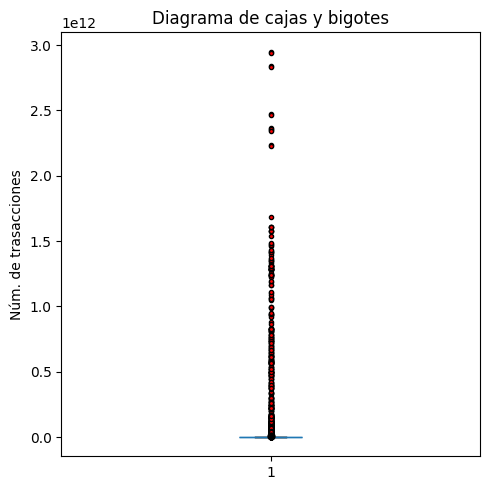

In [128]:
# Diagrama de cajas y bigotes para XDF
# Nota: el código R original usaba tabla_monto_eur por error; aquí se usa tabla_monto_xdf correctamente
fig, ax = plt.subplots(figsize=(5, 5))

datos_validos = tabla_monto_xdf['monto_real'].dropna()
ax.boxplot(datos_validos, patch_artist=True,
           boxprops=dict(facecolor='#a6cee3', color='#1f78b4'),
           medianprops=dict(color='#1f78b4'),
           flierprops=dict(markerfacecolor='red', marker='o', markersize=3))

ax.plot(1, datos_validos.mean(), marker='o', color='black', markersize=5, zorder=5)

plt.title('Diagrama de cajas y bigotes')
plt.xlabel('')
plt.ylabel('Núm. de trasacciones')
plt.tight_layout()
plt.show()

La distibución de monto para el tipo XDF es altamente asimetrica, con fuerte concentración de valores bajos y una cantidad significativa de valores extremos altos. Esto indica que aunque la mayoría de las transacciones tienen totales moderados, existen algunas con totales excepcionalmente altos que influyen notablemente en los estadísticos como la media y la desviación estándar.